In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos del CSV
file_path = "logs/ppo_Ts200kLr0.0003/ppo_Ts200kLr0.0003.csv"
data = pd.read_csv(file_path, index_col="steps")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 4000 to 200000
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   agent/reward_mean             50 non-null     float64
 1   agent/reward_max              50 non-null     float64
 2   agent/reward_min              50 non-null     float64
 3   agent/episode_len_mean        50 non-null     float64
 4   agent/kl_divergence           50 non-null     float64
 5   training/total_loss           50 non-null     float64
 6   training/policy_loss          50 non-null     float64
 7   training/grad_norm            50 non-null     float64
 8   training/learning_throughput  50 non-null     float64
 9   system/cpu_utilization        50 non-null     float64
 10  system/ram_utilization        50 non-null     float64
 11  system/sampling_throughput    50 non-null     float64
 12  system/sample_time_ms         50 non-null     float64
 13  syste

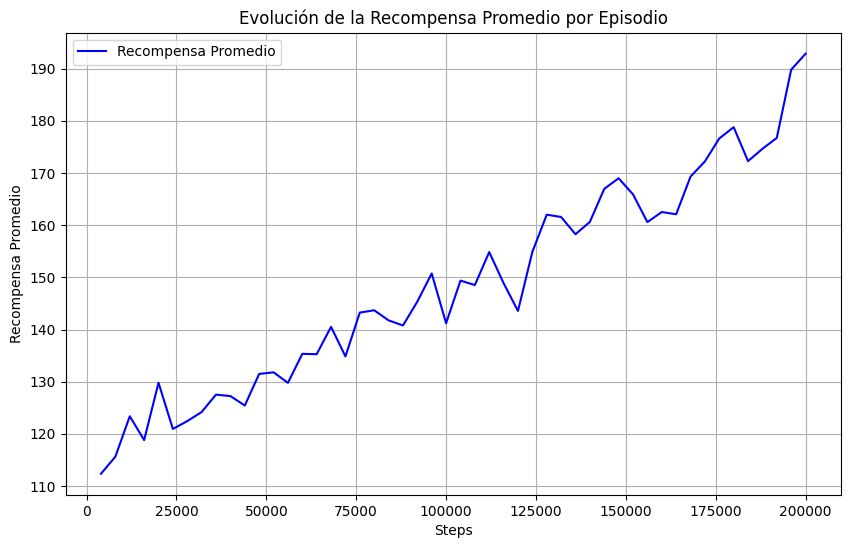

In [17]:
# ===============================
# 1. Evolución de la recompensa promedio
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["agent/reward_mean"], label="Recompensa Promedio", color="blue")
plt.title("Evolución de la Recompensa Promedio por Episodio")
plt.xlabel("Steps")
plt.ylabel("Recompensa Promedio")
plt.legend()
plt.grid()
plt.show()

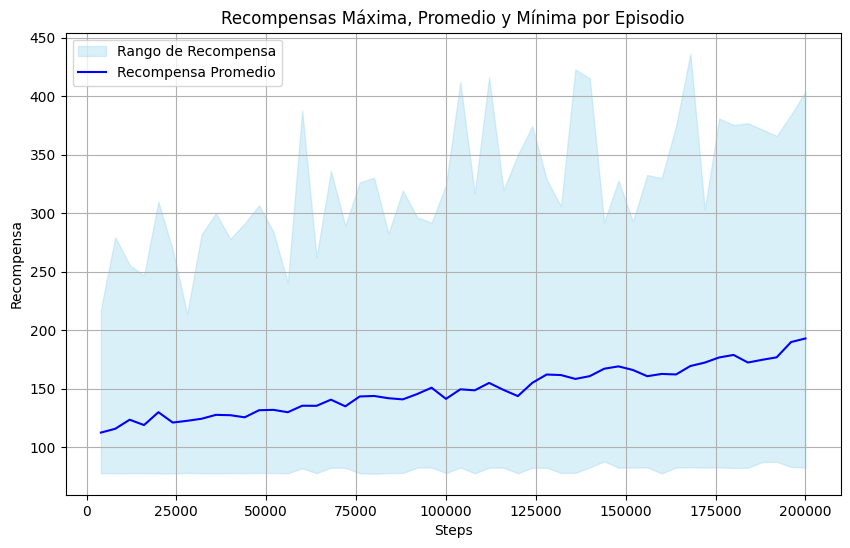

In [18]:
# ===============================
# 2. Recompensas máxima, promedio y mínima
# ===============================
plt.figure(figsize=(10, 6))
plt.fill_between(data.index, data["agent/reward_min"], data["agent/reward_max"], color="skyblue", alpha=0.3, label="Rango de Recompensa")
plt.plot(data.index, data["agent/reward_mean"], label="Recompensa Promedio", color="blue")
plt.title("Recompensas Máxima, Promedio y Mínima por Episodio")
plt.xlabel("Steps")
plt.ylabel("Recompensa")
plt.legend()
plt.grid()
plt.show()

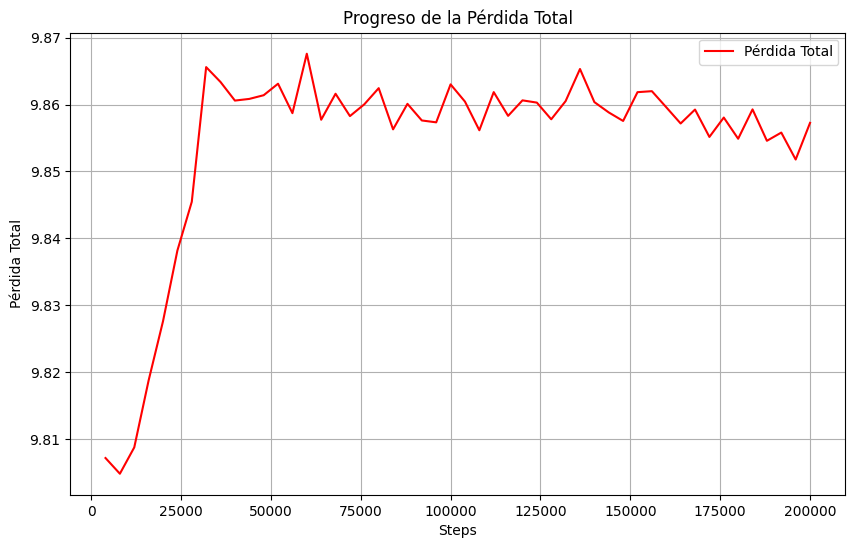

In [19]:
# ===============================
# 3. Progreso de la pérdida total
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["training/total_loss"], label="Pérdida Total", color="red")
plt.title("Progreso de la Pérdida Total")
plt.xlabel("Steps")
plt.ylabel("Pérdida Total")
plt.legend()
plt.grid()
plt.show()

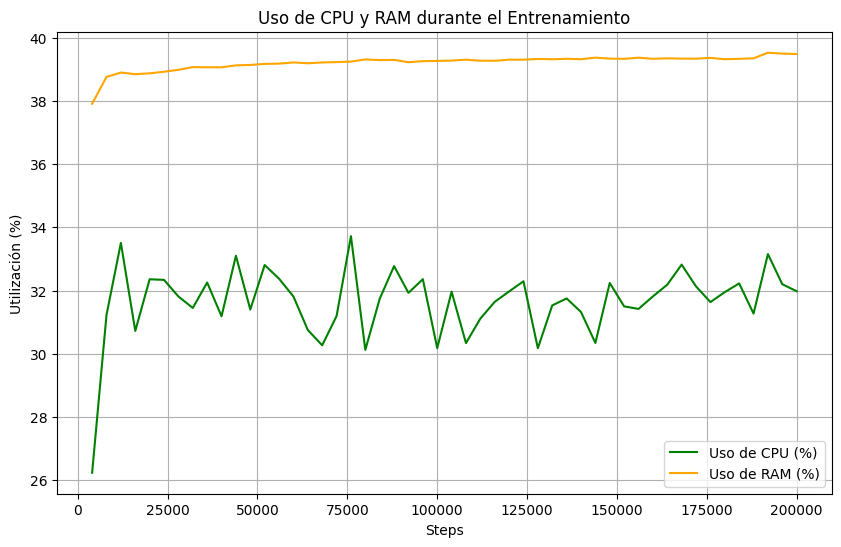

In [20]:
# ===============================
# 4. Uso de CPU y RAM
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["system/cpu_utilization"], label="Uso de CPU (%)", color="green")
plt.plot(data.index, data["system/ram_utilization"], label="Uso de RAM (%)", color="orange")
plt.title("Uso de CPU y RAM durante el Entrenamiento")
plt.xlabel("Steps")
plt.ylabel("Utilización (%)")
plt.legend()
plt.grid()
plt.show()

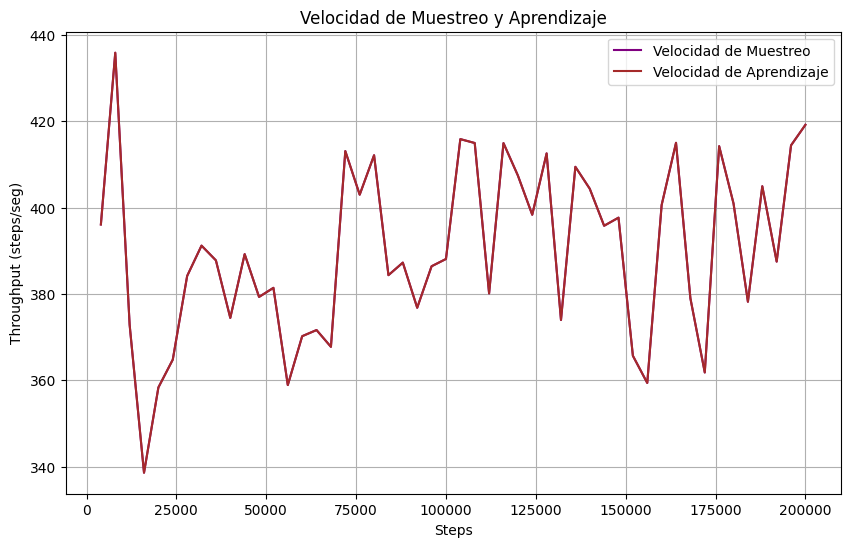

In [21]:
# ===============================
# 5. Velocidad de muestreo y aprendizaje
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["system/sampling_throughput"], label="Velocidad de Muestreo", color="purple")
plt.plot(data.index, data["training/learning_throughput"], label="Velocidad de Aprendizaje", color="brown")
plt.title("Velocidad de Muestreo y Aprendizaje")
plt.xlabel("Steps")
plt.ylabel("Throughput (steps/seg)")
plt.legend()
plt.grid()
plt.show()

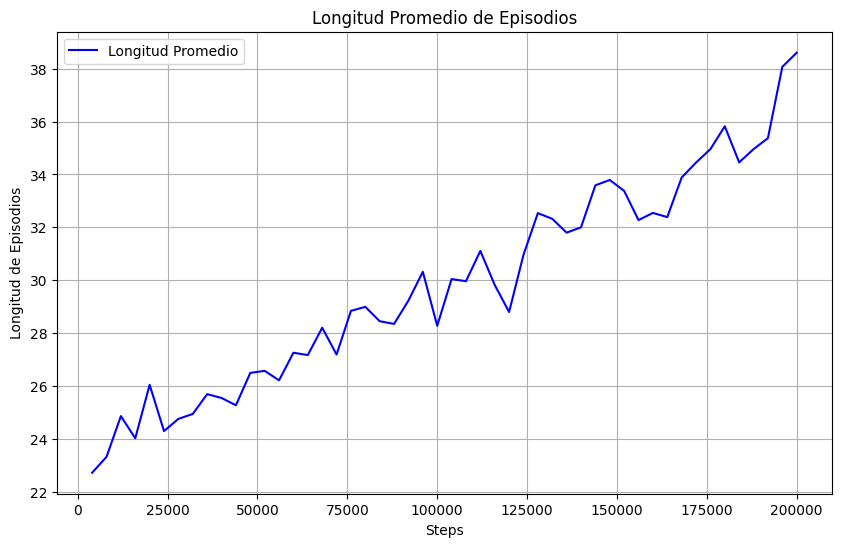

In [22]:
# ===============================
# 6. Longitud promedio de episodios
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["agent/episode_len_mean"], label="Longitud Promedio", color="blue")
plt.title("Longitud Promedio de Episodios")
plt.xlabel("Steps")
plt.ylabel("Longitud de Episodios")
plt.legend()
plt.grid()
plt.show()

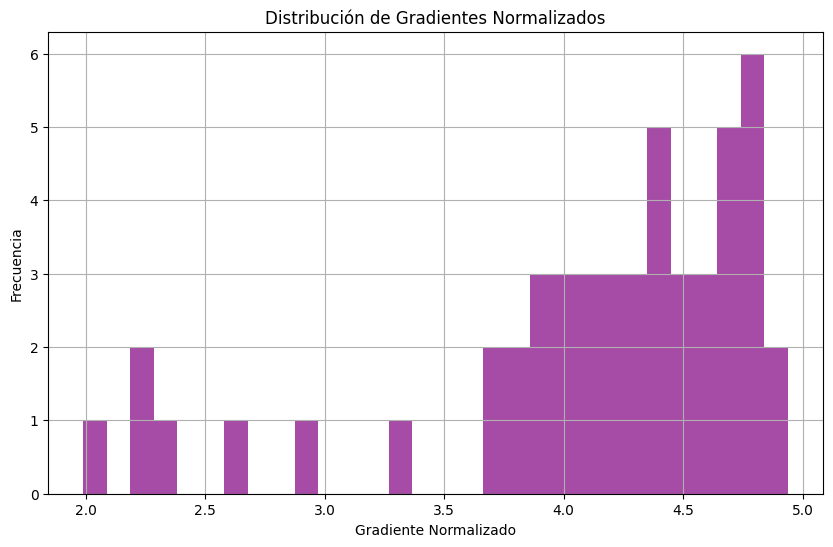

In [23]:
# ===============================
# 7. Distribución de gradientes normalizados
# ===============================
plt.figure(figsize=(10, 6))
plt.hist(data["training/grad_norm"].dropna(), bins=30, color="purple", alpha=0.7)
plt.title("Distribución de Gradientes Normalizados")
plt.xlabel("Gradiente Normalizado")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

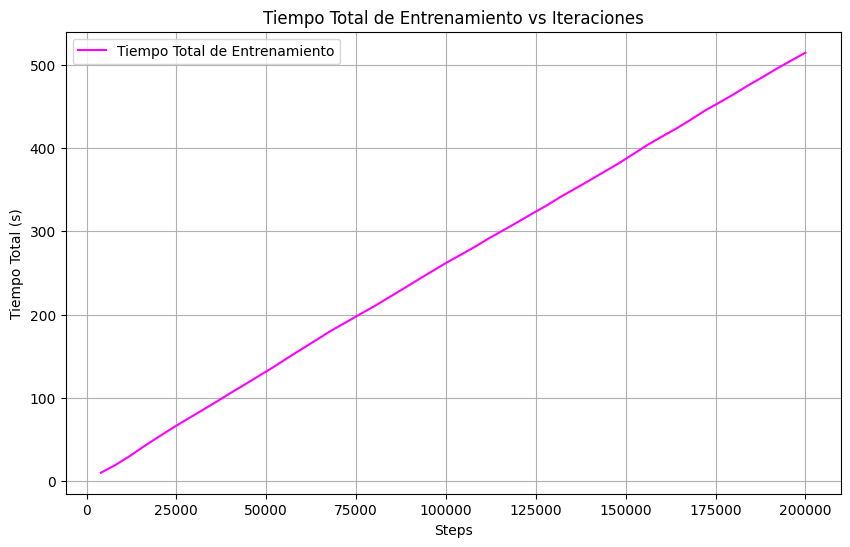

In [24]:
# ===============================
# 9. Tiempo total de entrenamiento
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["system/time_total_s"], label="Tiempo Total de Entrenamiento", color="magenta")
plt.title("Tiempo Total de Entrenamiento vs Iteraciones")
plt.xlabel("Steps")
plt.ylabel("Tiempo Total (s)")
plt.legend()
plt.grid()
plt.show()

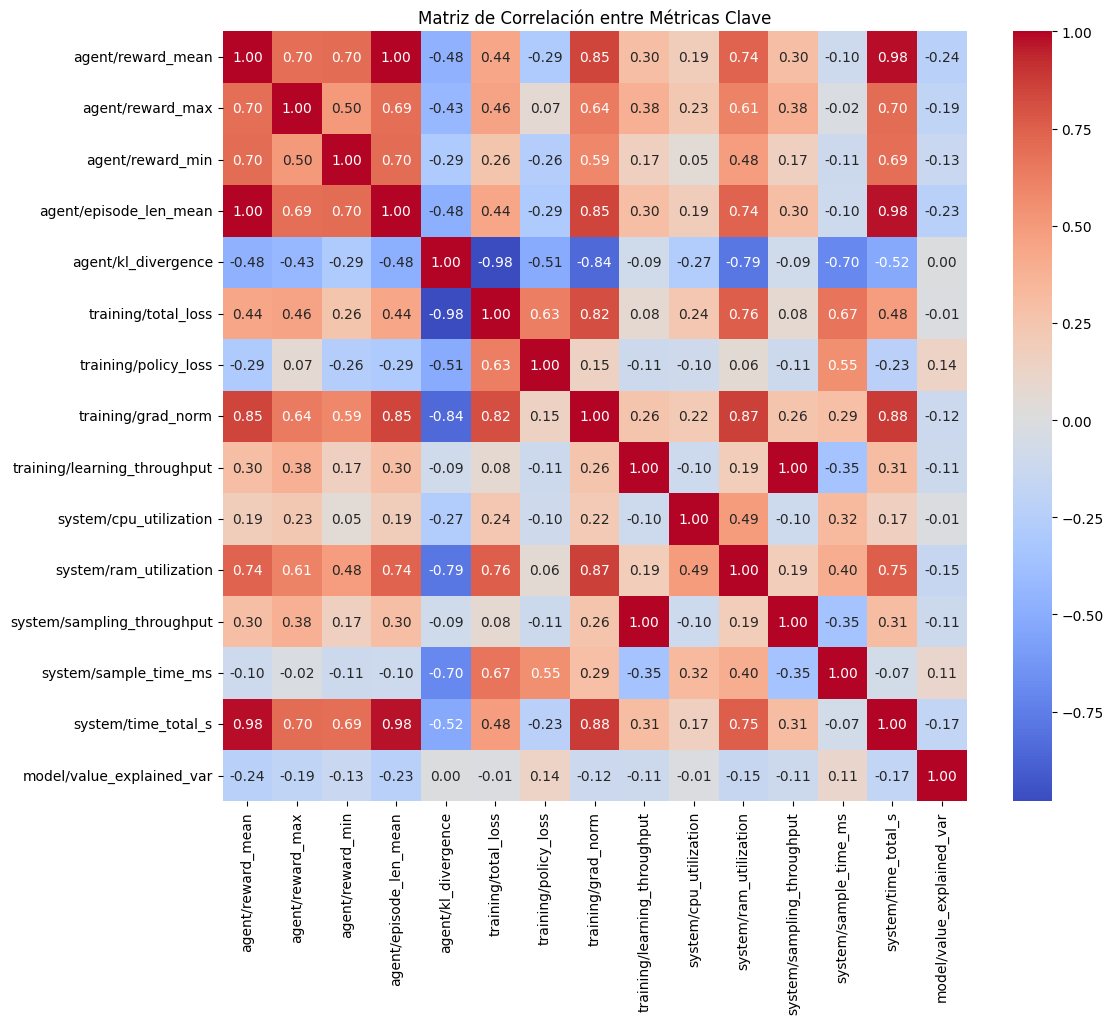

In [25]:
# ===============================
# 10. Correlación entre métricas clave
# ===============================
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Métricas Clave")
plt.show()